#Classification for Customer Churn

## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/telecom_churn.csv')
df.head()

<ipython-input-1-42697d995335>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

We are doing df.info to identify the datatypes of each columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,SeniorCitizen,tenure
count,7032.00,7032.00
mean,0.16,32.42
std,0.37,24.55
min,0.00,1.00
25%,0.00,9.00
50%,0.00,29.00
75%,0.00,55.00
max,1.00,72.00


In [ ]:
df.isnull().sum()

customerID           56
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges        852
Churn                 0
dtype: int64

In [ ]:
for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [ ]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")

customerID: Number of unique values 6976
gender: Number of unique values 2
SeniorCitizen: Number of unique values 2
Partner: Number of unique values 2
Dependents: Number of unique values 2
tenure: Number of unique values 72
PhoneService: Number of unique values 2
MultipleLines: Number of unique values 3
InternetService: Number of unique values 3
OnlineSecurity: Number of unique values 3
OnlineBackup: Number of unique values 3
DeviceProtection: Number of unique values 3
TechSupport: Number of unique values 3
StreamingTV: Number of unique values 3
StreamingMovies: Number of unique values 3
Contract: Number of unique values 3
PaperlessBilling: Number of unique values 2
PaymentMethod: Number of unique values 4
MonthlyCharges: Number of unique values 1584
TotalCharges: Number of unique values 5783
Churn: Number of unique values 2


## Data Cleaning

we drop customerID here since its unique to each customer and it would not benefit us in the decision tree model.

In [ ]:
df.drop(['customerID'], axis="columns", inplace=True)

We identify the unique values of every categorical column and we list them up together

In [ ]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : ['$29.85/m' '$56.95/m' '$53.85/m' ... '$63.1/m' '$44.2/m' '$78.7/m']
TotalCharges : ['$29.85' '$1889.5' '$108.15' ... '$346.45' '$306.6' '$6844.5']
Churn : ['No' 'Yes']


Removing "$" and "/m" For Monthly CHarges and Total Charges and changing to numeric

In [ ]:
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('[$, ]', '', regex=True)
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('[/m, ]', '', regex=True)
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'])

In [ ]:
df['TotalCharges'] = df['TotalCharges'].str.replace('[$, ]', '', regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Encoding Churn to 0 and 1 for Yes and No

In [ ]:
df['Churn'] = df['Churn'].astype('category').cat.codes
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int8

seeing that the amounts of 1s is less than 0s, we will not depend on accuracy score because yes and no values are not balance so we focus on percision and recall when evaluating the model

In [ ]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
df['Churn'].value_counts() / df['Churn'].count()

0   0.73
1   0.27
Name: Churn, dtype: float64

In [ ]:
correlation_with_churn = df.corr()['Churn']
correlation_sorted = correlation_with_churn.abs().sort_values(ascending=False)

most_correlated_attributes = correlation_sorted.index[1:]  # Exclude 'Churn' itself
print("Most correlated attributes with 'Churn':")
print(most_correlated_attributes)

Most correlated attributes with 'Churn':
Index(['tenure', 'TotalCharges', 'MonthlyCharges', 'SeniorCitizen'], dtype='object')


<ipython-input-15-e5495e33208a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_churn = df.corr()['Churn']


Calculate and fill missing values in 'TotalCharges' by multiplying 'tenure' and 'MonthlyCharges'

In [ ]:

df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'], inplace=True)

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


## Exploratory Data Analysis

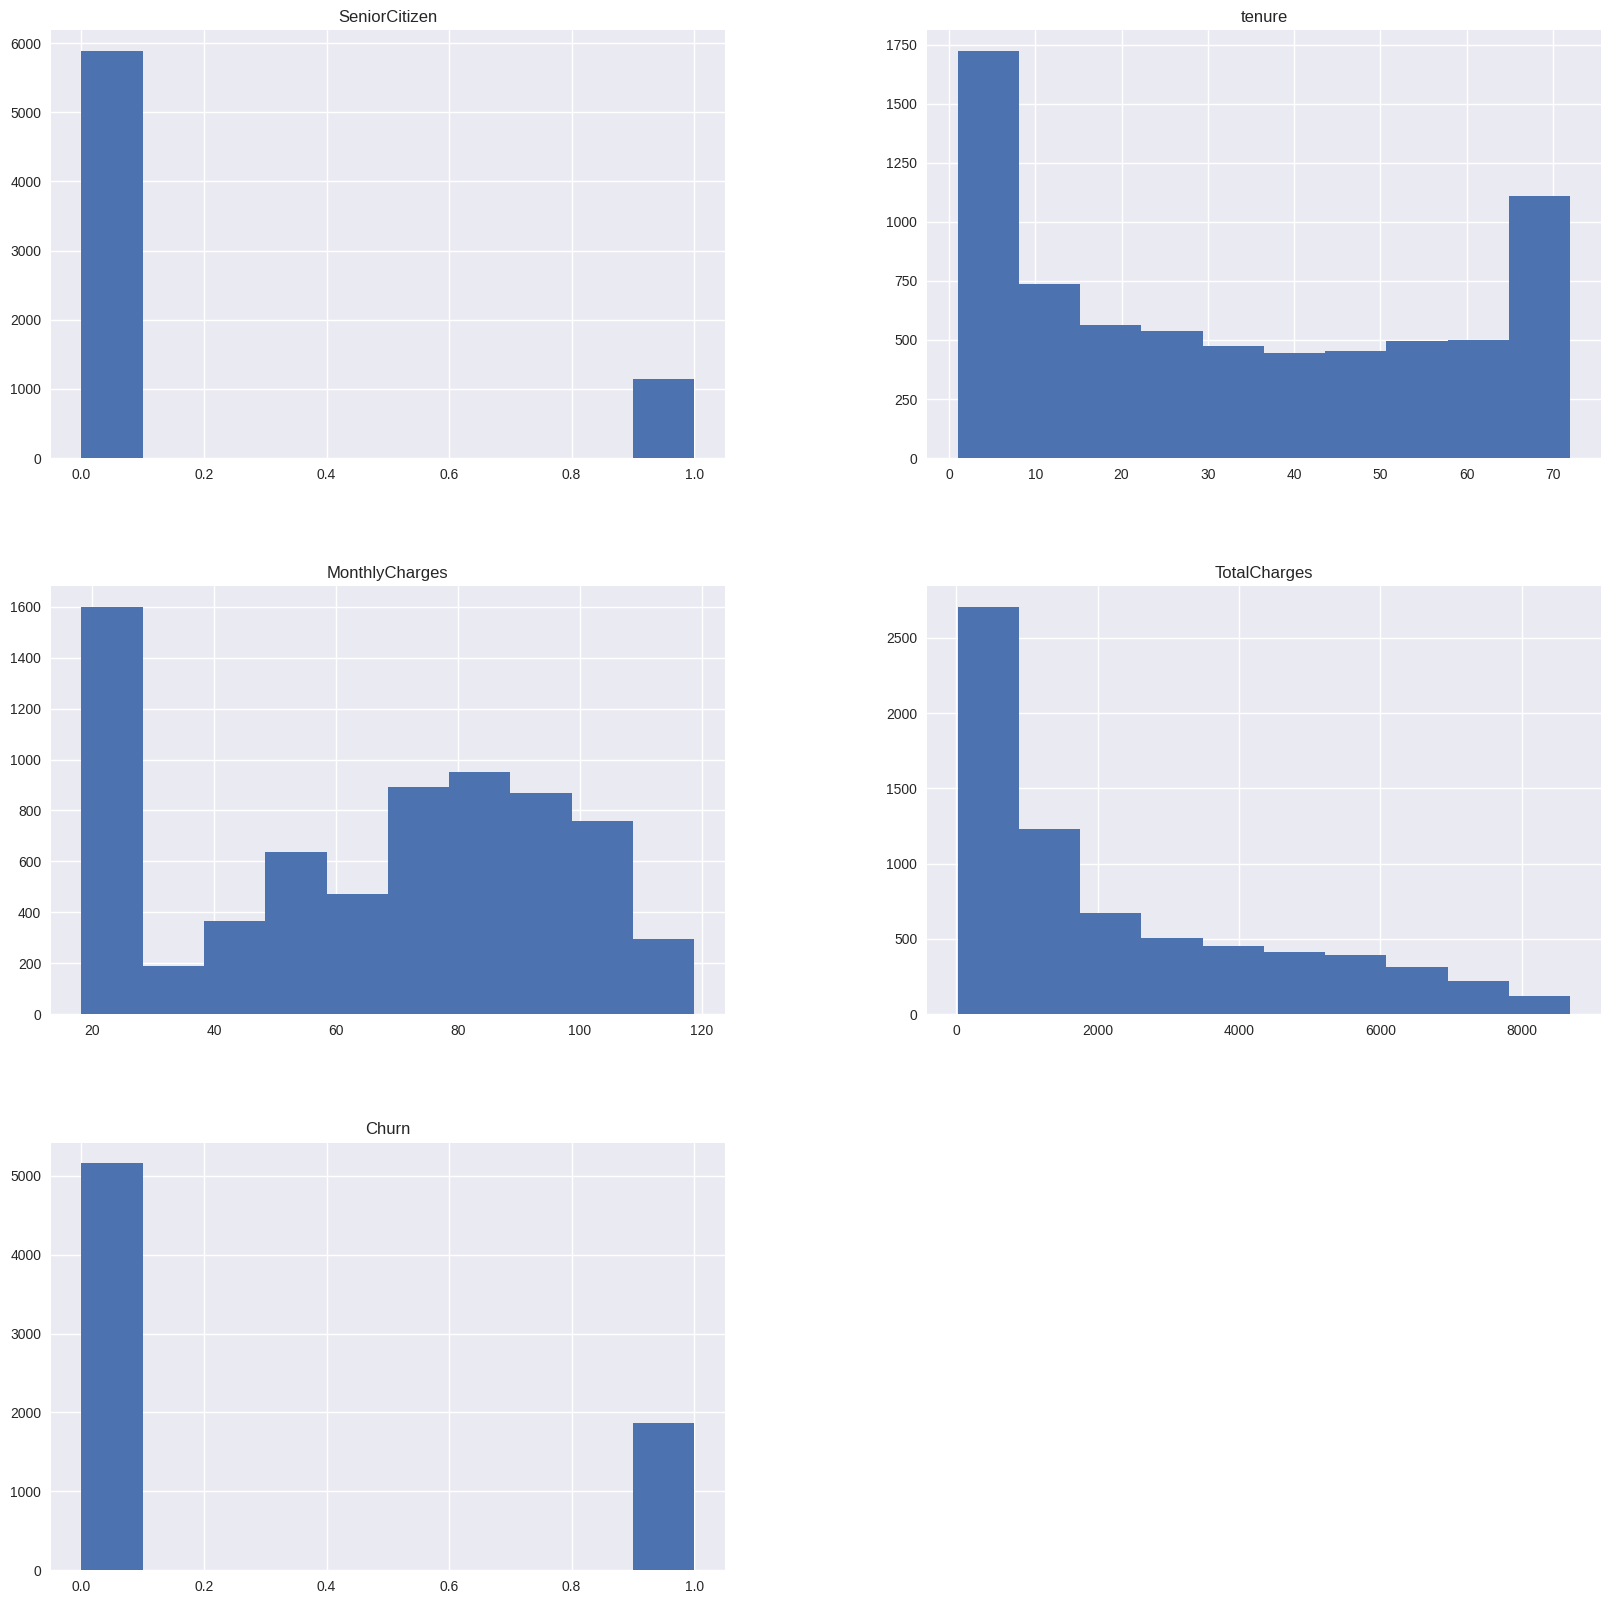

In [ ]:
df.hist(figsize=(20, 20));

**correlated attributes with customer churn**

**Visualization**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
categorical_features = categorical_col.copy()
categorical_features.remove('Churn')

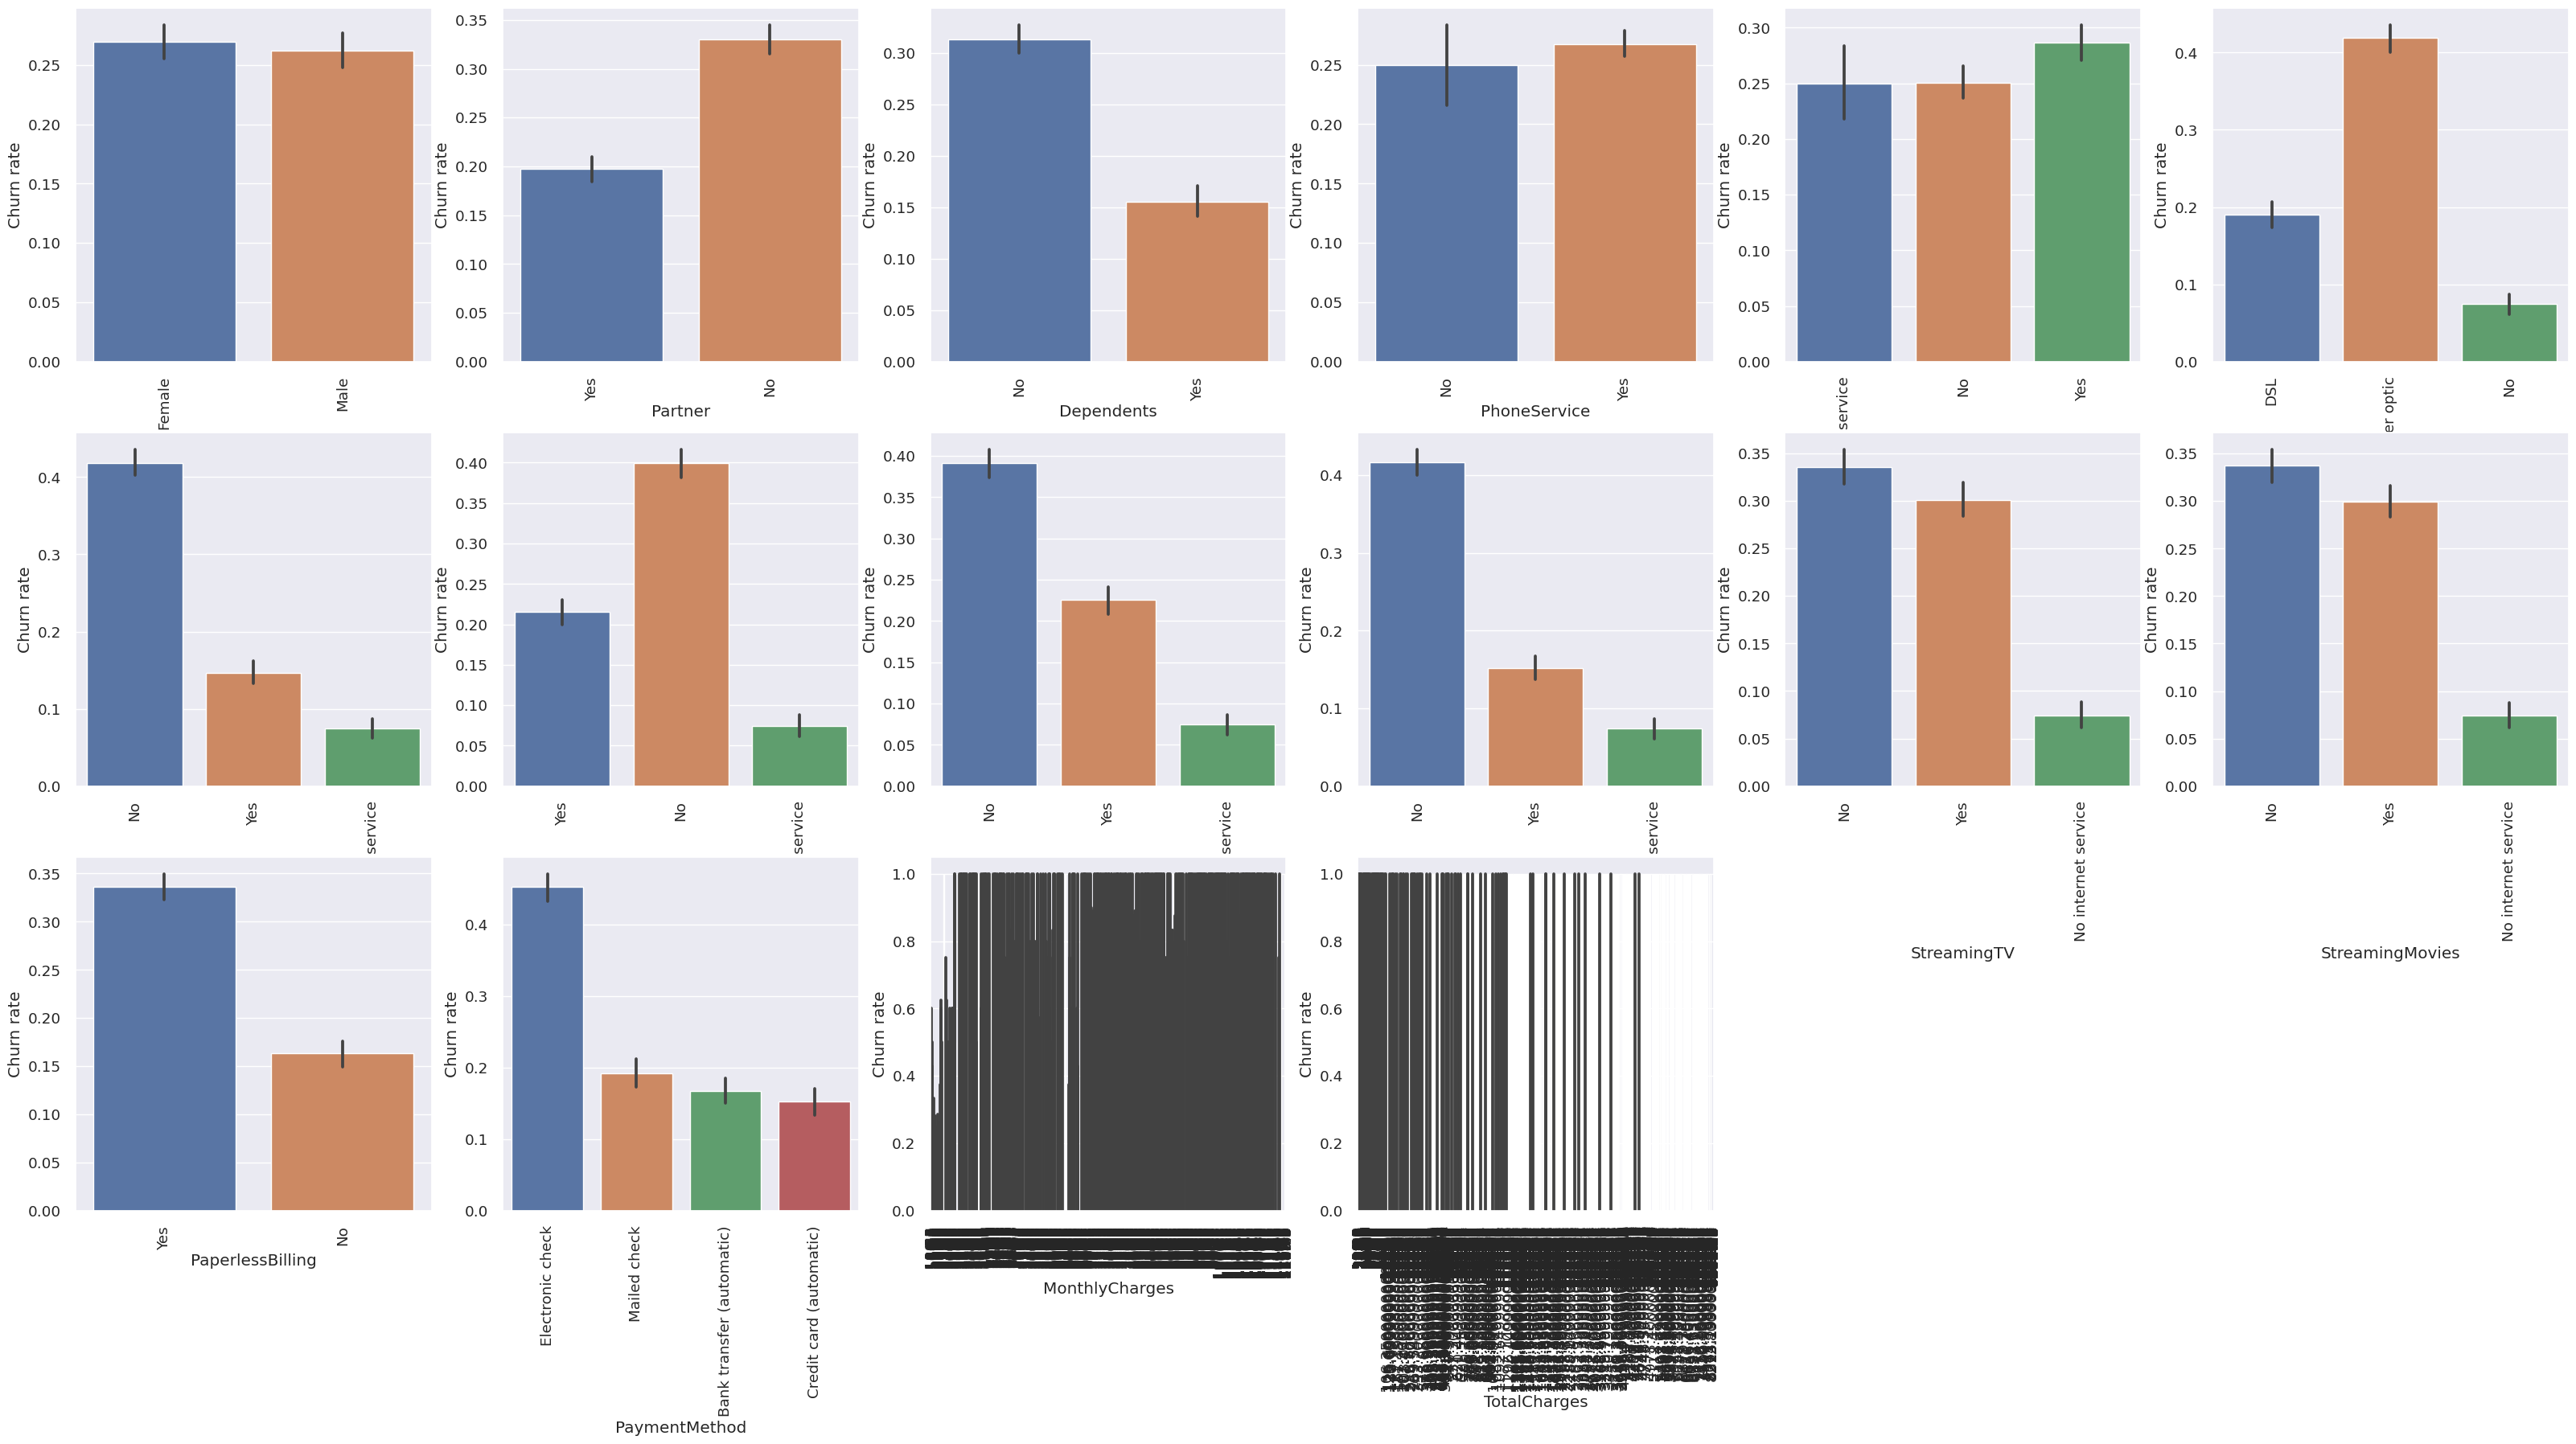

In [ ]:
# Plotting every feature average in relation to the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(6, 6, i)
    g = sns.barplot(x=column, y='Churn', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn rate')
    plt.xlabel(f'{column}')

In [ ]:
print("Categorical Features:", categorical_features)
print("DataFrame Columns:", df.columns)

Categorical Features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
DataFrame Columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


 Contract is the most correlated attribute to churn as it reaches to a maximum of 0.4 churn rate which is the highest of all attributes

**payment with method has the highest churn rate**

**Visualization**

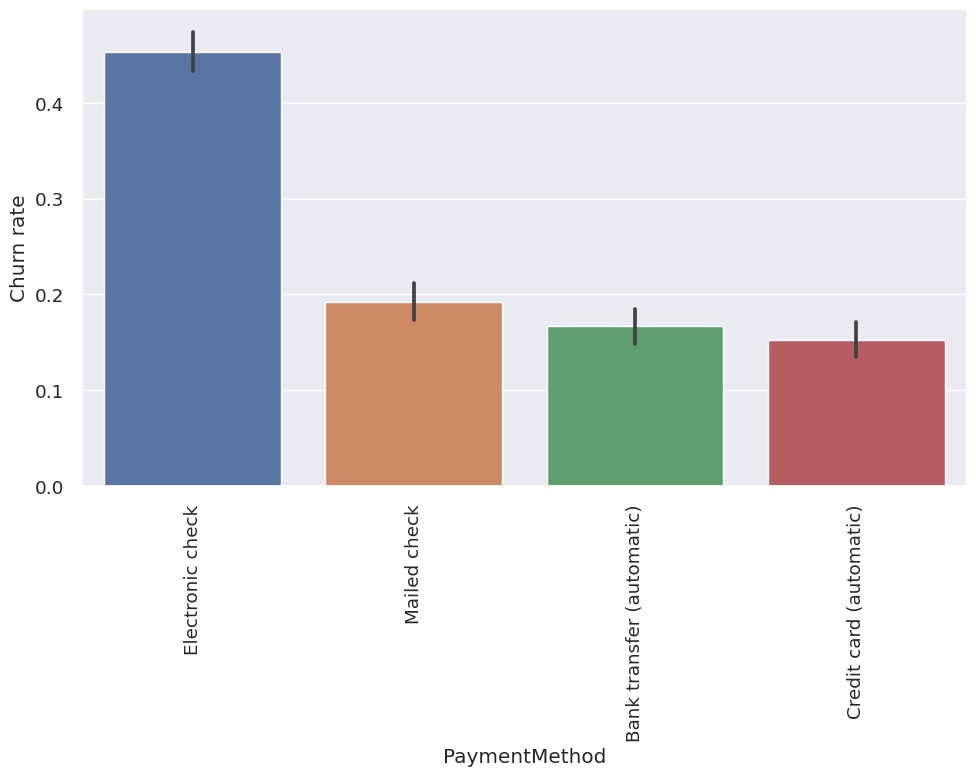

In [ ]:
# Plotting a specific feature in relation to the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Choose the specific column you want to visualize
target_column = 'PaymentMethod'

g = sns.barplot(x=target_column, y='Churn', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Churn rate')
plt.xlabel(f'{target_column}')

plt.tight_layout()
plt.show()


Electronic Check seems to have the highest churn rate

**After how many months do customers commonly churn**

**Visualization**

25th Percentile (Q1): 9.0 months
50th Percentile (Q2 or Median): 29.0 months
75th Percentile (Q3): 55.0 months


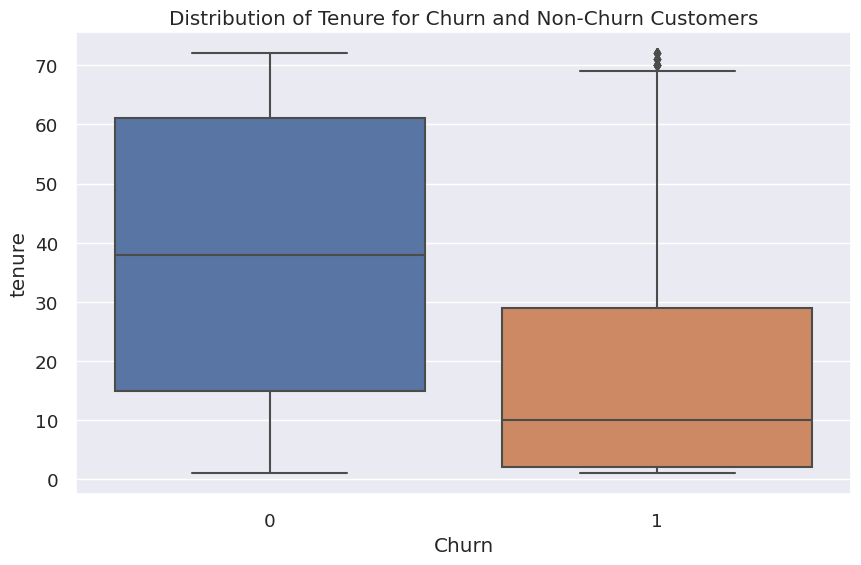

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
tenure_column = 'tenure'
tenure_stats = df[tenure_column].describe(percentiles=[0.25, 0.5, 0.75])

percentile_25 = tenure_stats['25%']
percentile_50 = tenure_stats['50%']
percentile_75 = tenure_stats['75%']

print(f'25th Percentile (Q1): {percentile_25} months')
print(f'50th Percentile (Q2 or Median): {percentile_50} months')
print(f'75th Percentile (Q3): {percentile_75} months')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y=tenure_column, data=df)
plt.title('Distribution of Tenure for Churn and Non-Churn Customers')
plt.show()

According to the Boxplot displayed above, it appears customers most commonly churn around 10 months

We implement the correlation matrix to see the correlation between attributes with Churn alongside developing the heatmap

In [ ]:
corr = df.corr()
corr

<ipython-input-26-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.00,0.02,0.22,0.10,0.15
tenure,0.02,1.00,0.25,0.83,-0.35
MonthlyCharges,0.22,0.25,1.00,0.65,0.19
TotalCharges,0.10,0.83,0.65,1.00,-0.20
Churn,0.15,-0.35,0.19,-0.20,1.00


In [ ]:
corr['Churn'].sort_values(ascending=False, key=lambda x: x.abs())

Churn             1.00
tenure           -0.35
TotalCharges     -0.20
MonthlyCharges    0.19
SeniorCitizen     0.15
Name: Churn, dtype: float64

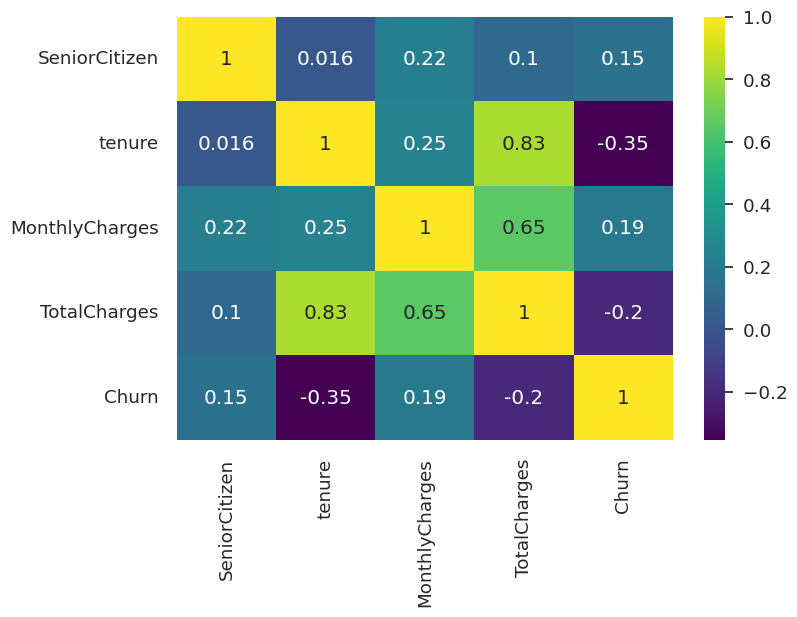

In [ ]:
sns.heatmap(corr, cmap='viridis', annot = True);

## Data Preparation for Modelling

Changing contract to ordinal. Month-to-Month as 0, one year as 1 and two year as 2.

In [ ]:
df['Contract'] = pd.Categorical(df['Contract'],
                                      categories=['Month-to-month', 'One year', 'Two year'],
                                      ordered=True)
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7027          One year
7028          One year
7029    Month-to-month
7030    Month-to-month
7031          Two year
Name: Contract, Length: 7032, dtype: category
Categories (3, object): ['Month-to-month' < 'One year' < 'Two year']

we remove the 'category' data type from contract

In [ ]:
df['Contract'] = df['Contract'].cat.codes
categorical_features.remove('Contract')
df['Contract']

0       0
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    2
Name: Contract, Length: 7032, dtype: int8

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,0,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,0,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,0,Yes,Electronic check,70.70,151.65,1


In [ ]:
df_encoded = df.copy()

here we one-hot encode the categorical columns but we split them into one with drop_first = true and false. we drop_first true because those columsn only have two values. while the drop_first false is for the columns with multiple values.

In [ ]:
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling' ]
df_encoded = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encoded.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encoded.shape)

Columns in original data frame:
 ['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges'
 'TotalCharges' 'Churn']

Number of rows and columns in the dataset: (7032, 20)

Columns in data frame after encoding dummy variable:
 ['SeniorCitizen' 'tenure' 'MultipleLines' 'InternetService' 'Contract'
 'PaymentMethod' 'MonthlyCharges' 'TotalCharges' 'Churn' 'gender_Male'
 'Partner_Yes' 'Dependents_Yes' 'PhoneService_Yes'
 'OnlineSecurity_No internet service' 'OnlineSecurity_Yes'
 'OnlineBackup_No internet service' 'OnlineBackup_Yes'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No internet service' 'TechSupport_Yes'
 'StreamingTV_No internet service' 'StreamingTV_Yes'
 'StreamingMovies_No internet service' 'StreamingMovies_Yes'
 'PaperlessBilling_Yes']


In [ ]:
categorical_columns = ['MultipleLines', 'PaymentMethod', 'InternetService' ]
df_encoded = pd.get_dummies(data=df_encoded,
                           columns=categorical_columns,
                           drop_first=False,
                           dtype='int8')

print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encoded.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encoded.shape)

Columns in original data frame:
 ['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges'
 'TotalCharges' 'Churn']

Number of rows and columns in the dataset: (7032, 20)

Columns in data frame after encoding dummy variable:
 ['SeniorCitizen' 'tenure' 'Contract' 'MonthlyCharges' 'TotalCharges'
 'Churn' 'gender_Male' 'Partner_Yes' 'Dependents_Yes' 'PhoneService_Yes'
 'OnlineSecurity_No internet service' 'OnlineSecurity_Yes'
 'OnlineBackup_No internet service' 'OnlineBackup_Yes'
 'DeviceProtection_No internet service' 'DeviceProtection_Yes'
 'TechSupport_No internet service' 'TechSupport_Yes'
 'StreamingTV_No internet service' 'StreamingTV_Yes'
 'StreamingMovies_No internet service' 'StreamingMovies_Yes'
 'PaperlessBilling_Yes' 'MultipleLines_No'
 'MultipleLines_No phone service'

In [ ]:
df_encoded.head()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,1,0,29.85,29.85,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0,34,1,56.95,1889.50,0,1,0,0,1,...,1,0,0,0,0,0,1,1,0,0
2,0,2,0,53.85,108.15,1,1,0,0,1,...,1,0,0,0,0,0,1,1,0,0
3,0,45,1,42.30,1840.75,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,0,2,0,70.70,151.65,1,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0


## Modelling

we train and test the model

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Tree Visualization

decision tree description: Contract <= 0.5, if true then internetservice fiber optic <= 0.5. if False, tenure <=15.5. If false, payment method electronic check <= 0.5. if true, seniorCitzen <= 0.5. If false, total charges <= 2637.25, if false, tenure <= 30.5, if true, gini = 0.0

the visulization of the tree

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph
# alternatively, to export:
#graph.render('Churn')

## Evaluation

here is the evalution of the tree by extracting the accuracy, perscision and recall.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   3614.00 1308.00      1.00    4922.00       4922.00
_______________________________________________
Confusion Matrix: 
 [[3613    1]
 [   6 1302]]

Test Result:
Accuracy Score: 72.42%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.82   0.48      0.72       0.65          0.73
recall       0.81   0.50      0.72       0.65          0.72
f1-score     0.81   0.49      0.72       0.65          0.73
support   1549.00 561.00      0.72    2110.00       2110.00
_______________________________________________
Confusion Matrix: 
 [[1247  302]
 [ 

here are the exact values of the percision and recall scores

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = tree_clf.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.48198970840480276
Recall:  0.5008912655971479
F1_score:  0.49125874125874125


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

clf = DecisionTreeClassifier(random_state=42)
# since we have a relatively small dataset (~1000 records),
# we'll use a low number of splits
skf = StratifiedKFold(n_splits=3)

# Note how cross validation is applied on the training dataset
# The testing dataset is always left out and used -only- in the final evaluation
scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='f1')
scores

array([0.51954023, 0.51569507, 0.48457143])

now that we have extracted the scores, we develop the confusion matrix

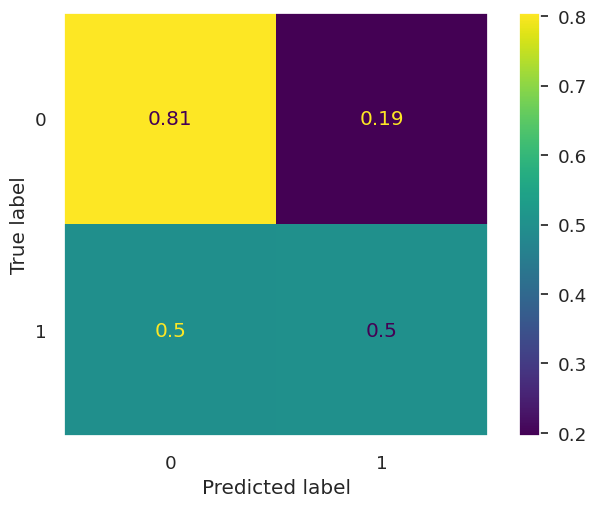

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

In [ ]:
print("Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Score: 0.51 (+/- 0.03)


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   Contract                                 7032 non-null   int8   
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   Churn                                    7032 non-null   int8   
 6   gender_Male                              7032 non-null   int8   
 7   Partner_Yes                              7032 non-null   int8   
 8   Dependents_Yes                           7032 non-null   int8   
 9   PhoneService_Yes                         7032 non-null   int8   
 10  OnlineSecurity_No internet service       7032 no


**Extra**

First we normalize the numerical columns before desiging the logistic regression model

In [ ]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

df_encoded[numerical_columns] = (

    df_encoded[numerical_columns] - df_encoded[numerical_columns].min()

) /(

    df_encoded[numerical_columns].max() - df_encoded[numerical_columns].min()
)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Here we create the logistic regression model from scratch where we set the logistic model the same way we set the decision tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7962085308056872
Confusion Matrix:
 [[1382  167]
 [ 263  298]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1549
           1       0.64      0.53      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



These are the final scores of the logistic regression model. Showing that it has much higher scores than the ones in the decsision tree model.

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

pred = model.predict(X_test)

print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.6408602150537634
Recall:  0.5311942959001783
F1_score:  0.580896686159844
